# **Yelp Ratings**

In [1]:
# Import packages
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
df = pd.read_csv("data/MSBA Exit_Yelp.csv")

# Preview the data
df.head()

,attributes,business_id,categories,city,hours,is_open,latitude,longitude,postal_code,review_count,state,stars
0,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...",922049,"Home Organization, Interior Design, Profession...",Portland,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-17:0', '...",1,45.551736,-122.552248,97220,11,OR,5.0
1,"{'WiFi': ""u'free'"", 'RestaurantsGoodForGroups'...",492976,"Burgers, Restaurants",Portland,"{'Monday': '11:0-20:0', 'Tuesday': '11:0-21:0'...",1,45.519562,-122.675040,97204,790,OR,4.0
2,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",125987,"Home Services, Tree Services, Landscaping",Austin,"{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",1,30.296603,-97.970185,78738,6,TX,4.0
3,{'ByAppointmentOnly': 'True'},445542,"Chiropractors, Massage Therapy, Health & Medical",Portland,NaN,0,45.520668,-122.672014,97204,15,OR,5.0
4,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...",225939,"Apartments, Real Estate, Home Services",Orlando,"{'Monday': '9:0-18:0', 'Tuesday': '10:0-18:0',...",0,28.520020,-81.457009,32811,7,FL,4.5


In [6]:
len(df.state.unique())

25

In [3]:
df.shape

(120437, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120437 entries, 0 to 120436
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   attributes    109193 non-null  object 
 1   business_id   120437 non-null  int64  
 2   categories    120351 non-null  object 
 3   city          120437 non-null  object 
 4   hours         99879 non-null   object 
 5   is_open       120437 non-null  int64  
 6   latitude      120437 non-null  float64
 7   longitude     120437 non-null  float64
 8   postal_code   120355 non-null  object 
 9   review_count  120437 non-null  int64  
 10  state         120437 non-null  object 
 11  stars         120437 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.0+ MB


In [5]:
df['is_open'].unique()

array([1, 0], dtype=int64)

In [9]:
df['review_count'].min()

5

In [14]:
sum(df['review_count'] == 5)

10477

In [15]:
df.loc[df['review_count'] == 5, 'stars'].mean()

3.7079793834112817

## Data Cleaning

In [6]:
df.isnull().sum()

attributes      11244
business_id         0
categories         86
city                0
hours           20558
is_open             0
latitude            0
longitude           0
postal_code        82
review_count        0
state               0
stars               0
dtype: int64

In [ ]:
# Function to evaluate closing status based on hours
def evaluate_closing_status(hours):
    if pd.isnull(hours):
        return "unknown"

    try:
        hours_dict = json.loads(hours.replace("'", '"'))
        closed_days = [day for day, time in hours_dict.items() if time == '0:0-0:0']
        
        if 'Sunday' in closed_days and len(closed_days) == 1:
            return "closed on sunday"
        elif 'Saturday' in closed_days and len(closed_days) == 1:
            return "closed on saturday"
        elif 'Saturday' in closed_days and 'Sunday' in closed_days:
            return "closed on week-ends"
        else:
            week_days_closed = [day for day in closed_days if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']]
            if week_days_closed:
                return f"closed on {len(week_days_closed)} week day(s)"
            return "open all week"
    except:
        return "unknown"

# Apply the function to the hours column
df['closing_status'] = df['hours'].apply(evaluate_closing_status)

# Display the resulting dataframe
df[['business_id', 'hours', 'closing_status']].head()

## Exploratory Data

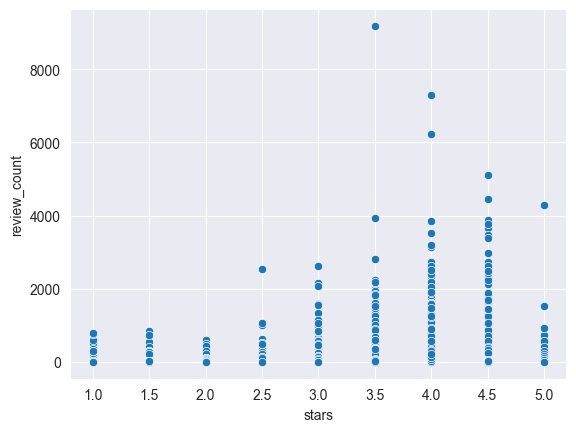

In [8]:
sns.scatterplot(df, x="stars", y="review_count")

plt.show()

## **Model Development**

In [4]:
df.isnull().sum() / df.shape[0] * 100

attributes       9.336001
business_id      0.000000
categories       0.071407
city             0.000000
hours           17.069505
is_open          0.000000
latitude         0.000000
longitude        0.000000
postal_code      0.068085
review_count     0.000000
state            0.000000
stars            0.000000
dtype: float64

In [3]:
df.shape[0]

120437